In this exercise we will reproduce Hans Roslings famous animation. We will proceed in four steps:

Load the data to multiple DataFrames  
Merge the DataFrames into one  
Generate one scatterplot for each year.  
Connect the images to an animated GIF.

In [7]:
import pandas as pd
fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0)
fert.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71


In [6]:
life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col=0)
life.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [8]:
print(life.shape)
print(fert.shape)

(260, 217)
(260, 216)


In [10]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [11]:
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

In [13]:
# One table has columns as strings, the other has integer numbers. 
# To merge the tables, we need to convert both into the same format. 
# First, we create a list of years as integers.
ncol = [int(x) for x in fert.columns]

In [14]:
# and use this list as the new columns:
fert.set_axis(axis=1, labels=ncol, inplace=True)

In [15]:
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [18]:
# To obtain nice column names, you can also create a hierarchical index. 
# For that, we convert both tables to the long format:

sfert = fert.stack()
sfert

Total fertility rate      
Afghanistan           1800    7.00
                      1801    7.00
                      1802    7.00
                      1803    7.00
                      1804    7.00
                              ... 
Zimbabwe              2011    3.64
                      2012    3.56
                      2013    3.49
                      2014    3.41
                      2015    3.35
Length: 43412, dtype: float64

In [19]:
slife = life.stack()
slife

Life expectancy      
Afghanistan      1800    28.21
                 1801    28.20
                 1802    28.19
                 1803    28.18
                 1804    28.17
                         ...  
South Sudan      2012    56.00
                 2013    56.00
                 2014    56.10
                 2015    56.10
                 2016    56.10
Length: 43857, dtype: float64

In [21]:
# The variables sfert and slife now have the type pd.Series.
# Multiple Series can be converted to a pd.DataFrame, using a dictionary with the values:

d = {'fertility': sfert, 'lifeexp': slife}
df2 = pd.DataFrame(data=d)
df2

fertility  lifeexp
Afghanistan 1800        7.0    28.21
            1801        7.0    28.20
            1802        7.0    28.19
            1803        7.0    28.18
            1804        7.0    28.17
...                     ...      ...
Åland       2002        NaN    81.80
            2003        NaN    80.63
            2004        NaN    79.88
            2005        NaN    80.00
            2006        NaN    80.10

[44007 rows x 2 columns]

In [22]:
pop = pd.read_excel('gapminder_population.xlsx', index_col=0)
pop.head()

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


In [23]:
pop.shape

(275, 81)

In [24]:
pop.columns

Int64Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
            1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
            1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015],
           dtype='int64')

In [36]:
spop=pop.stack()
df2["population"]=pd.DataFrame(spop)
df2.head()

fertility  lifeexp  population
Afghanistan 1800        7.0    28.21   3280000.0
            1801        7.0    28.20         NaN
            1802        7.0    28.19         NaN
            1803        7.0    28.18         NaN
            1804        7.0    28.17         NaN

In [38]:
df3 = df2.stack()
df3

Afghanistan  1800  fertility           7.00
                   lifeexp            28.21
                   population    3280000.00
             1801  fertility           7.00
                   lifeexp            28.20
                                    ...    
Åland        2004  population      26530.00
             2005  lifeexp            80.00
                   population      26766.00
             2006  lifeexp            80.10
                   population      26923.00
Length: 103764, dtype: float64

In [46]:
# Finally we can convert the long table back to a wide one. 
# For that we create new columns from the 1st and 3rd level of the index 
# (the country names and attributes):

# The zero stands for the first element of an index. 
# With the value 1 all year numbers would end up as columns.
# Now df4 is a table, with years on the left side and life expectancy and 
# fertility for a ll countries on top.

df4 = df3.unstack((0,2))
df4.head()

Afghanistan                      Albania                      Algeria  \
       fertility lifeexp population fertility lifeexp population fertility   
1800         7.0   28.21  3280000.0       4.6    35.4   410445.0      6.99   
1801         7.0   28.20        NaN       4.6    35.4        NaN      6.99   
1802         7.0   28.19        NaN       4.6    35.4        NaN      6.99   
1803         7.0   28.18        NaN       4.6    35.4        NaN      6.99   
1804         7.0   28.17        NaN       4.6    35.4        NaN      6.99   

                        American Samoa  ...   Yemen               Zambia  \
     lifeexp population        lifeexp  ... lifeexp population fertility   
1800   28.82  2503218.0            NaN  ...   23.39  2593000.0      6.71   
1801   28.82        NaN            NaN  ...   23.39        NaN      6.71   
1802   28.82        NaN            NaN  ...   23.39        NaN      6.71   
1803   28.82        NaN            NaN  ...   23.39        NaN      6.71   
1804   28.82        NaN            NaN  ...   23.39        NaN      6.71   

                         Zimbabwe                      Åland             
     lifeexp population fertility lifeexp population lifeexp population  
1800    32.6   747000.0      6.75    33.7  1085814.0     NaN        NaN  
1801    32.6        NaN      6.75    33.7        NaN     NaN        NaN  
1802    32.6        NaN      6.75    33.7        NaN     NaN        NaN  
1803    32.6        NaN      6.75    33.7        NaN     NaN        NaN  
1804    32.6        NaN      6.75    33.7        NaN     NaN        NaN  

[5 rows x 621 columns]

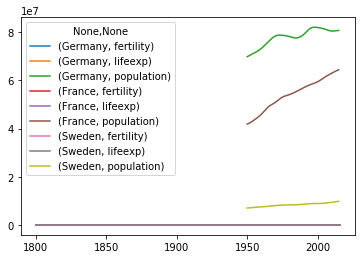

In [127]:
import pylab as plt
df4[['Germany', 'France', 'Sweden']].plot()

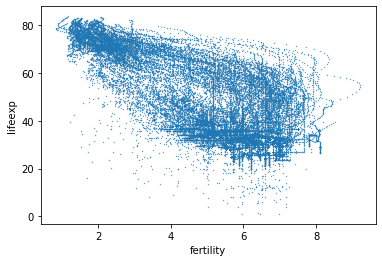

In [264]:
# To create a scatterplot, we extract the columns to plot from df3:

df5 = df3.unstack(2)
df5.plot.scatter('fertility', 'lifeexp', s=0.1)

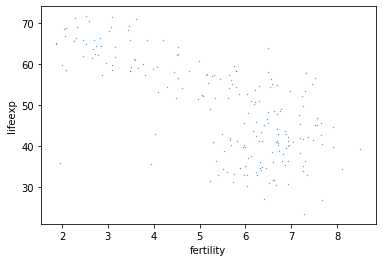

In [265]:
# Using stack and unstack you can also select a year. That makes the plot easier to read:

df6 = df3.unstack(1)
df6 = df6[1950]
df6 = df6.unstack(1)
df6.plot.scatter('fertility', 'lifeexp', s=0.1)

In [181]:
## Using stack and unstack you can also select a year. That makes the plot easier to read:

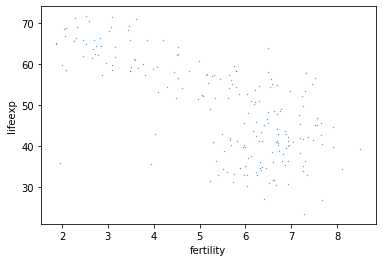

In [273]:
df6 = df3.unstack(1)
df6=df6[1950].unstack(1)
df6.plot.scatter('fertility', 'lifeexp', s=0.1)

Text(0.5, 0, 'Fertility')

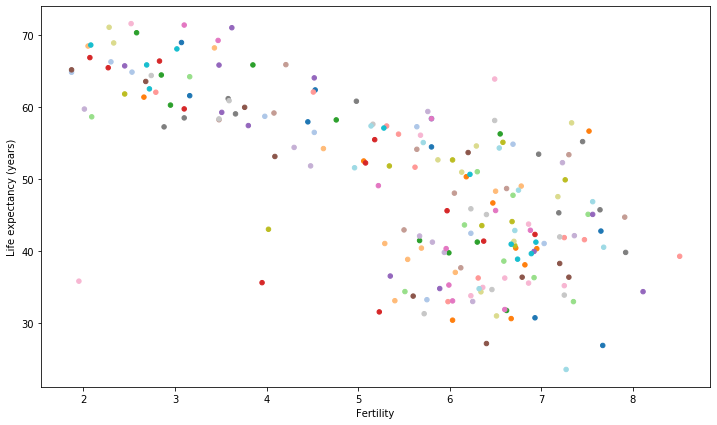

In [335]:
# Now we can improve our graphics, e.g. color each country differently:
cmap = plt.get_cmap('tab20', lut = len(df6)).colors
df6.plot.scatter('fertility', 'lifeexp', s=20, c=cmap, figsize=(12,7))
plt.ylabel("Life expectancy (years)")
plt.xlabel("Fertility")

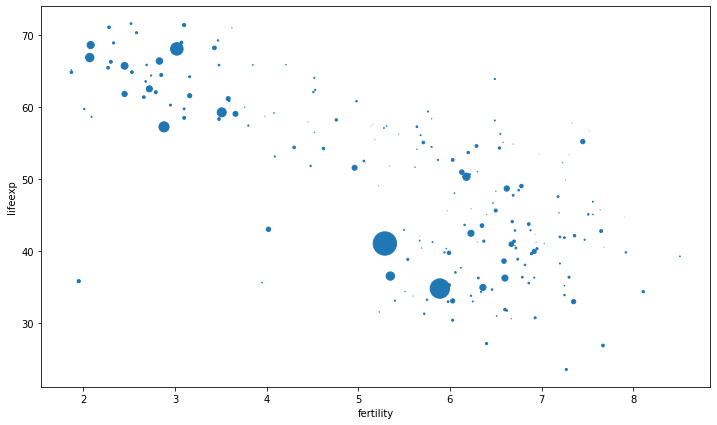

In [324]:

df6.plot.scatter('fertility', 'lifeexp', s=df6['population']/1000000, figsize=(12,7))

To create an animated scatterplot showing the correlation between life expectancy and fertility, create one plot for each year between 1960 and 2015 (before that, the data contains too many gaps).

Save each scatterplot to a separate file containing the year in the filename, e.g. lifeexp_1999.png .

Hint Use the function plt.axis((a,b,c,d)) to fix the coordinates of the plot.

In [261]:
df7=df6.transpose().loc[1960:2015].transpose()
df7.head()

1960        1961        1962        1963  \
Afghanistan fertility         7.67        7.67        7.67        7.67   
            lifeexp          31.94       32.47       33.01       33.53   
            population  8994793.00  9164945.00  9343772.00  9531555.00   
Albania     fertility         6.19        6.08        5.96        5.83   
            lifeexp          62.87       63.92       64.84       65.60   

                              1964        1965         1966         1967  \
Afghanistan fertility         7.67        7.67         7.67         7.67   
            lifeexp          34.07       34.60        35.13        35.66   
            population  9728645.00  9935358.00  10148841.00  10368600.00   
Albania     fertility         5.71        5.59         5.48         5.38   
            lifeexp          66.18       66.59        66.88        67.11   

                               1968         1969  ...         2006  \
Afghanistan fertility          7.67         7.67  ...         6.70   
            lifeexp           36.17        36.69  ...        52.10   
            population  10599790.00  10849510.00  ...  25183615.00   
Albania     fertility          5.27         5.16  ...         1.85   
            lifeexp           67.32        67.55  ...        76.40   

                               2007         2008         2009         2010  \
Afghanistan fertility          6.46         6.20         5.93         5.66   
            lifeexp           52.40        52.80        53.30        53.60   
            population  25877544.00  26528741.00  27207291.00  27962207.00   
Albania     fertility          1.80         1.76         1.74         1.74   
            lifeexp           76.60        76.80        77.00        77.20   

                               2011         2012         2013         2014  \
Afghanistan fertility          5.40         5.14         4.90         4.68   
            lifeexp           54.00        54.40        54.80        54.90   
            population  28809167.00  29726803.00  30682500.00  31627506.00   
Albania     fertility          1.75         1.76         1.77         1.78   
            lifeexp           77.40        77.50        77.70        77.90   

                               2015  
Afghanistan fertility          4.47  
            lifeexp           53.80  
            population  32526562.00  
Albania     fertility          1.78  
            lifeexp           78.00  

[5 rows x 56 columns]

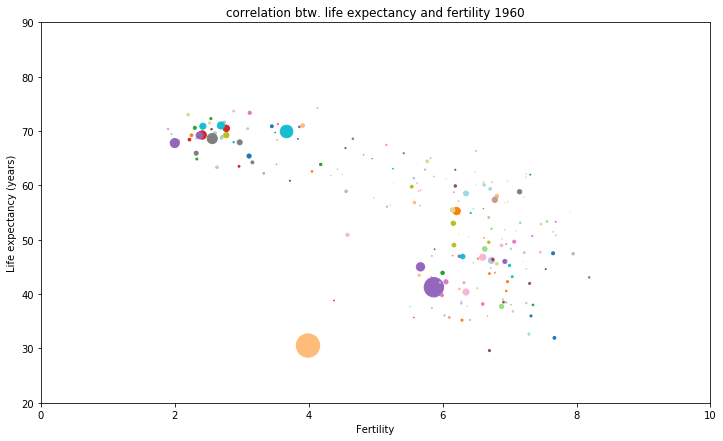

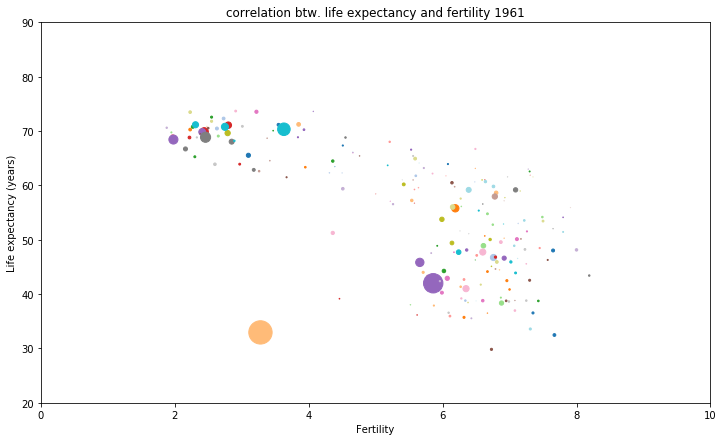

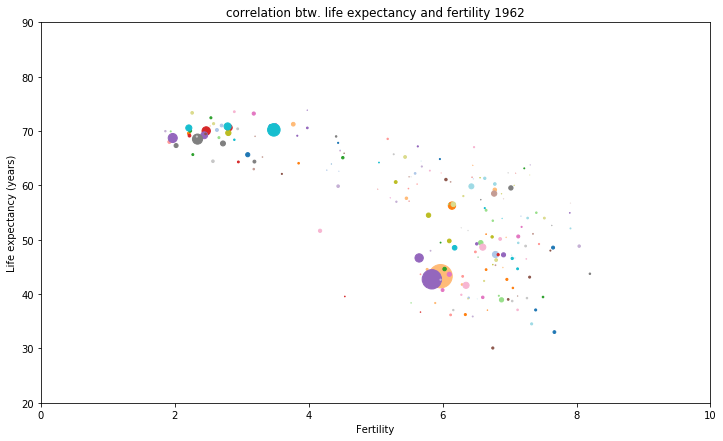

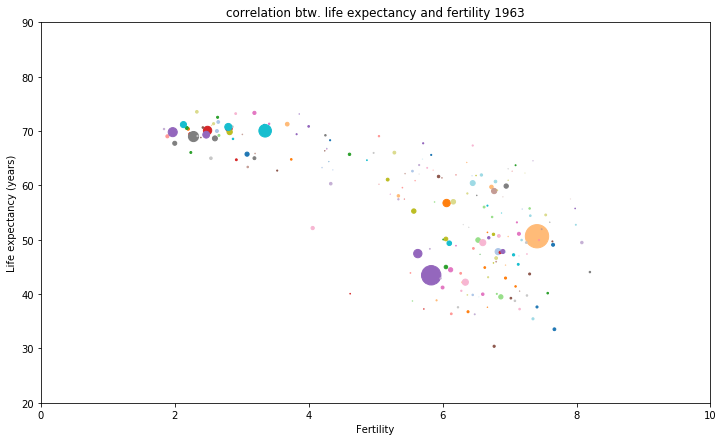

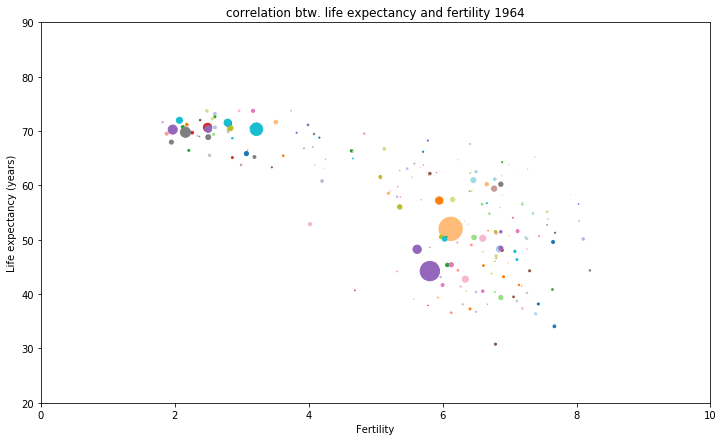

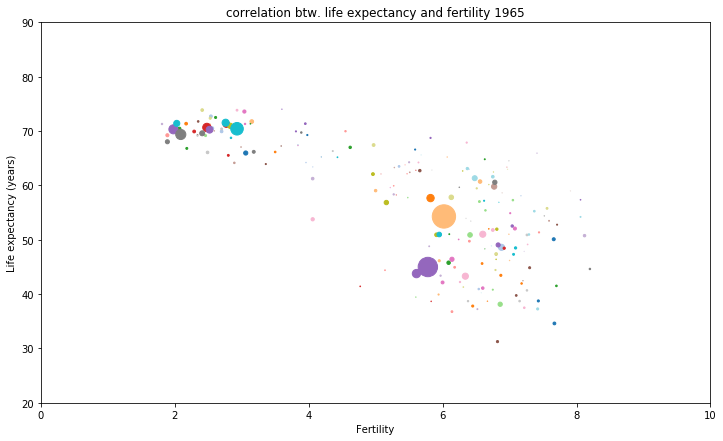

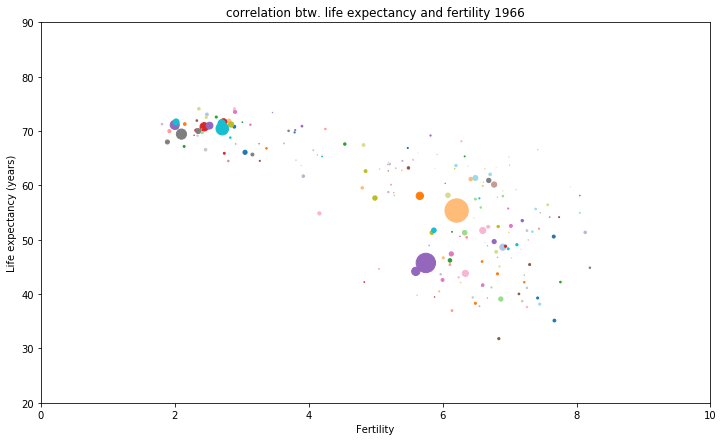

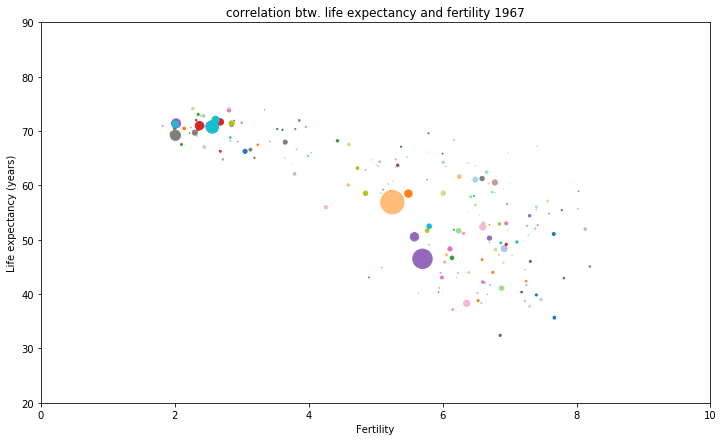

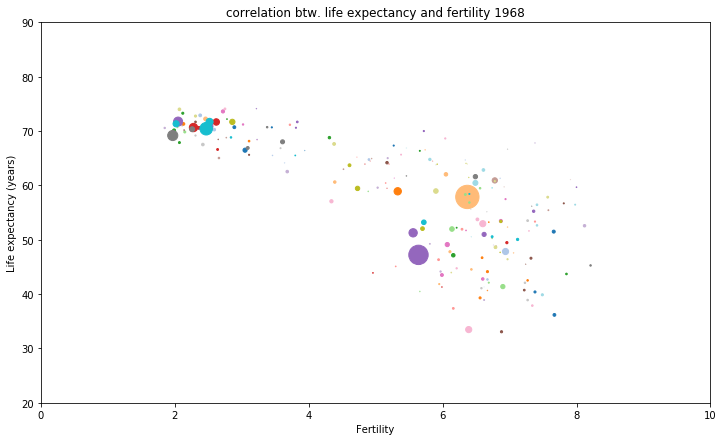

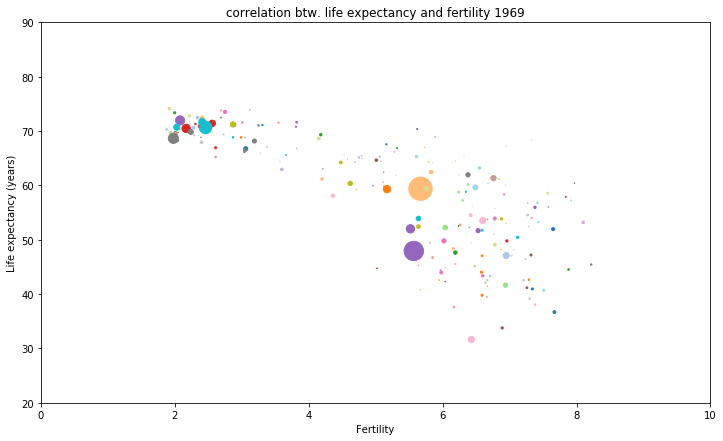

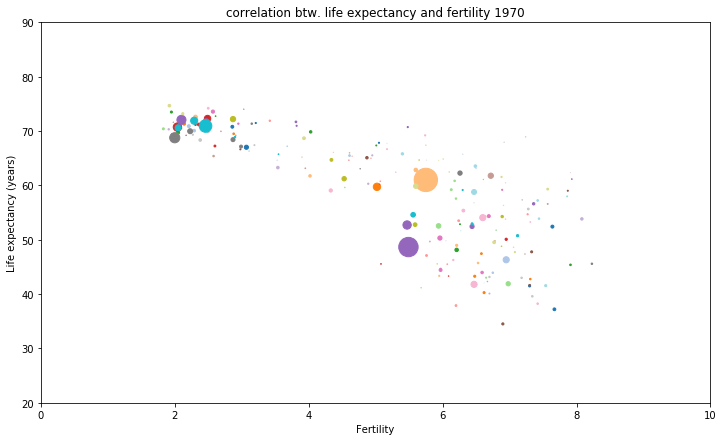

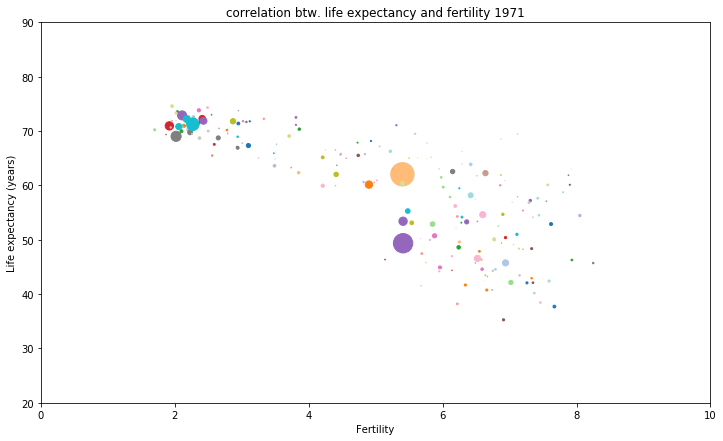

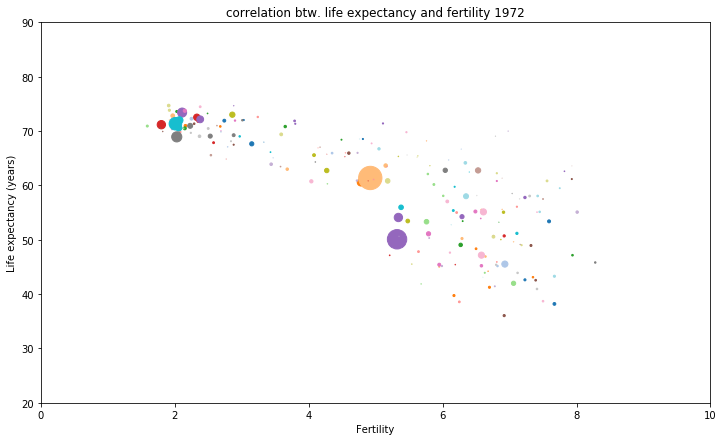

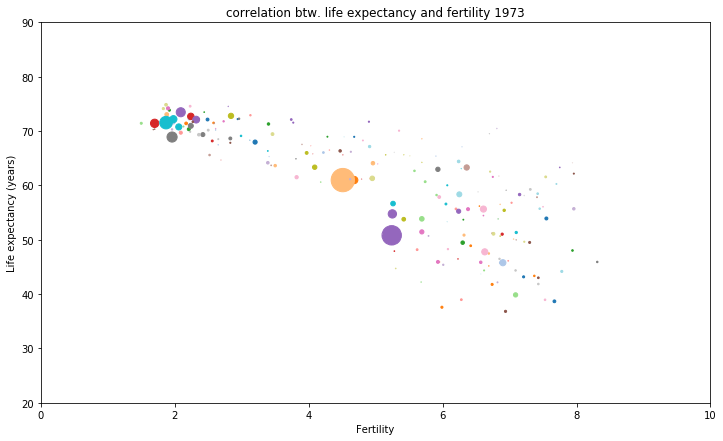

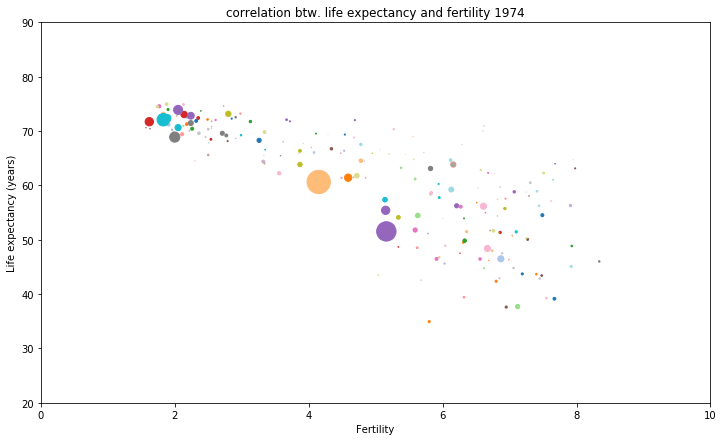

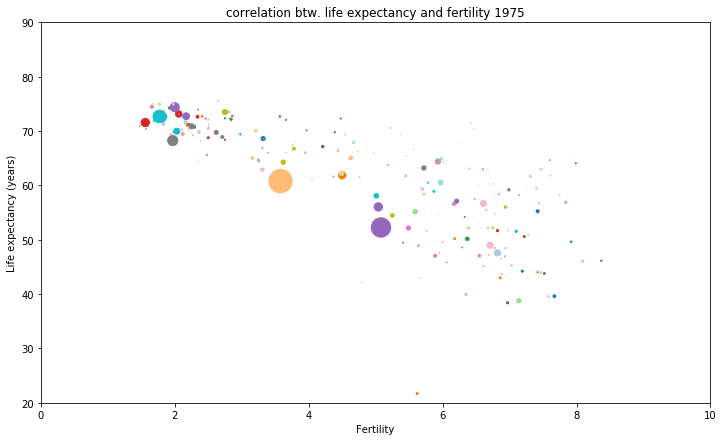

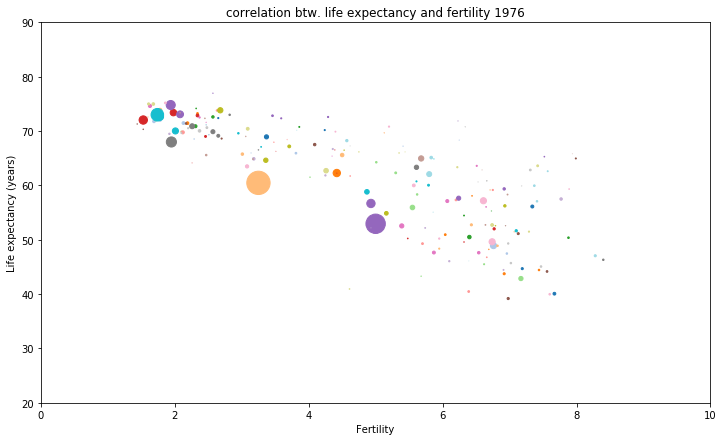

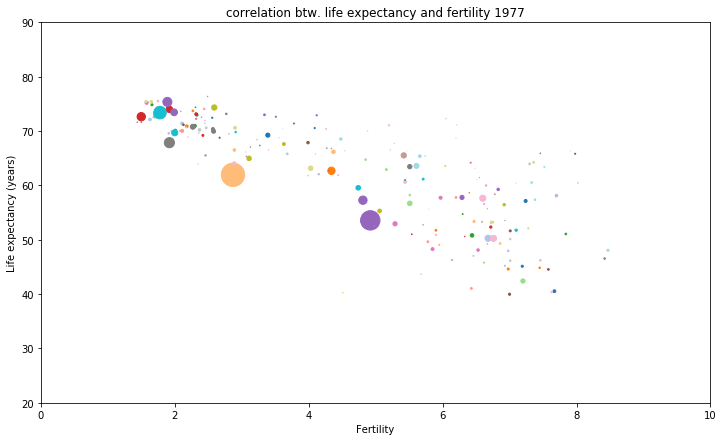

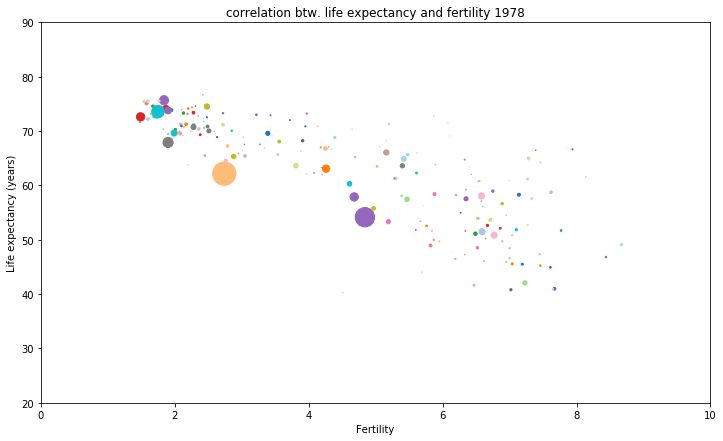

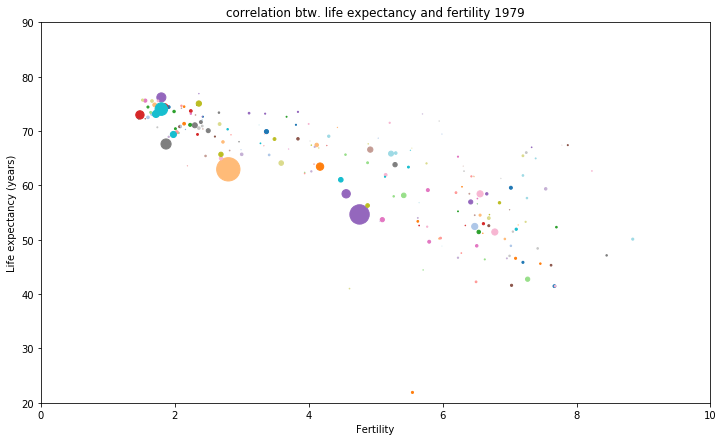

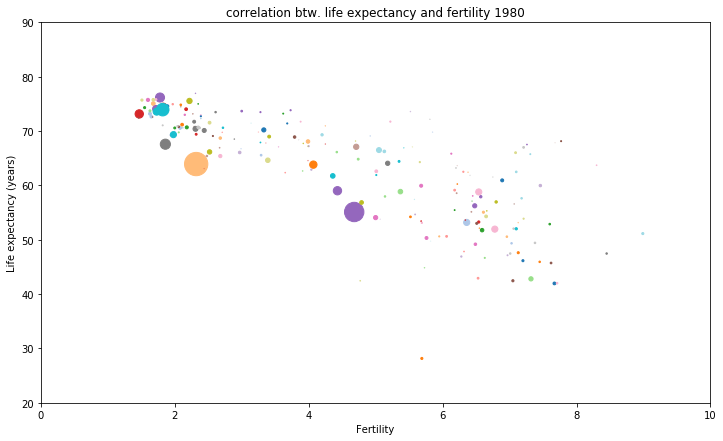

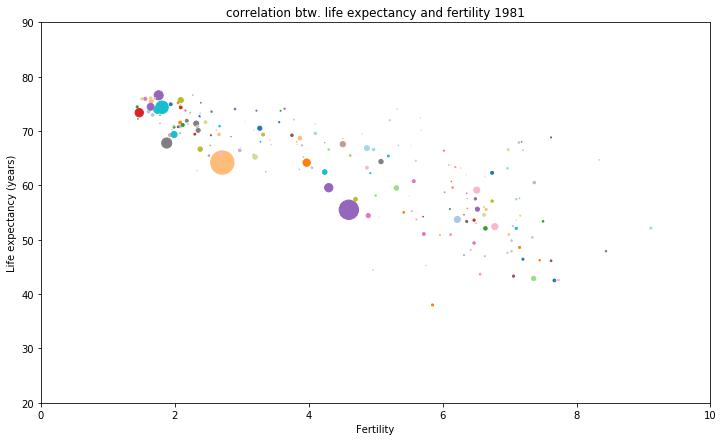

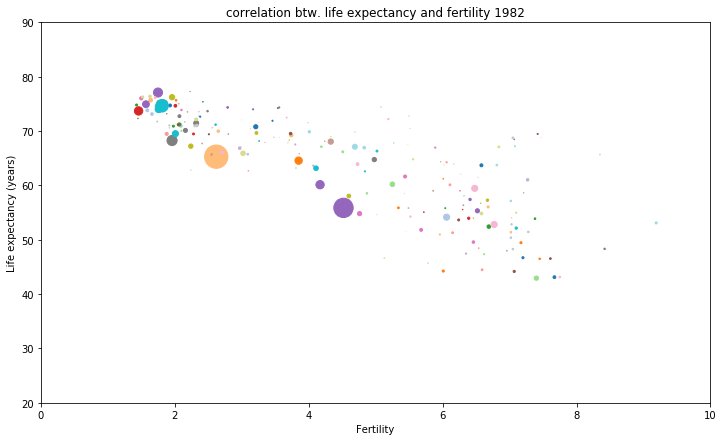

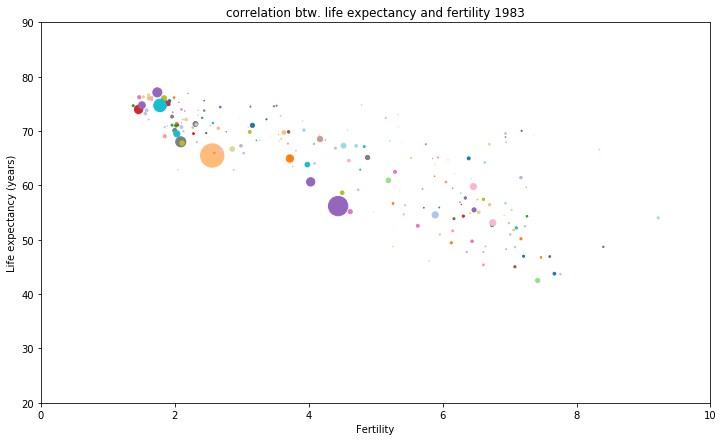

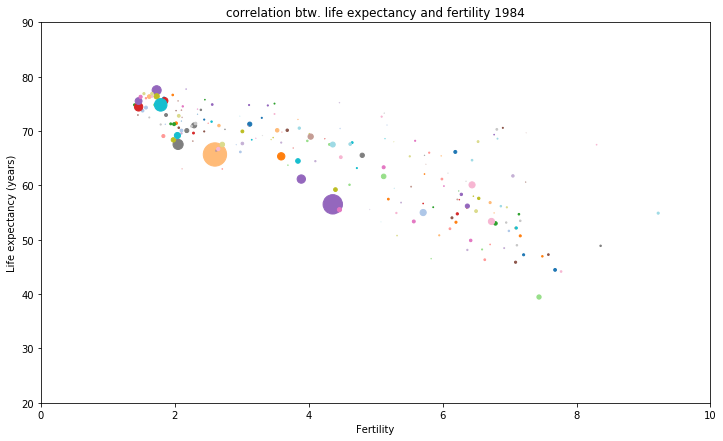

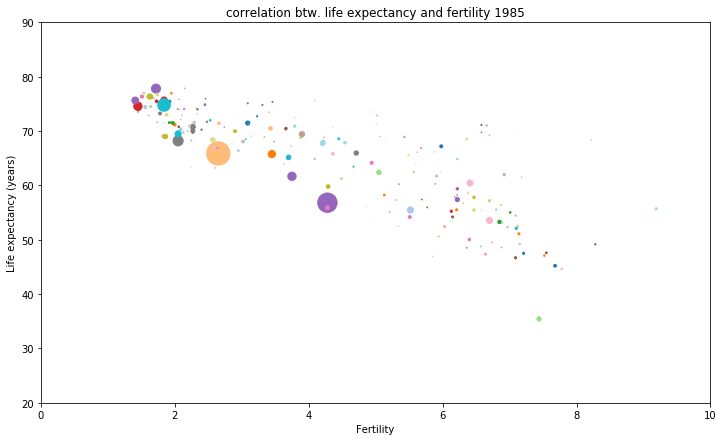

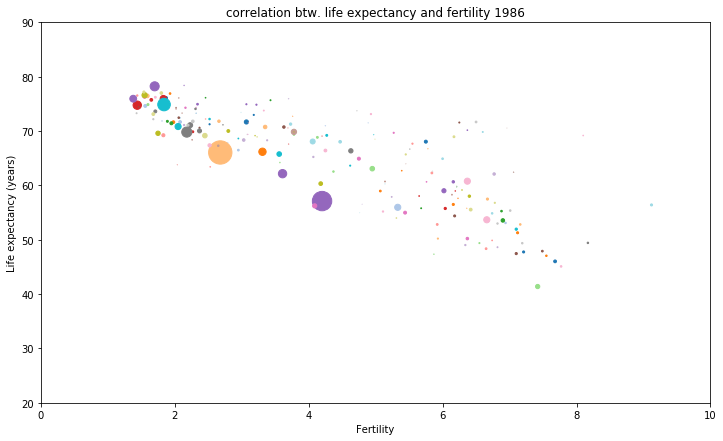

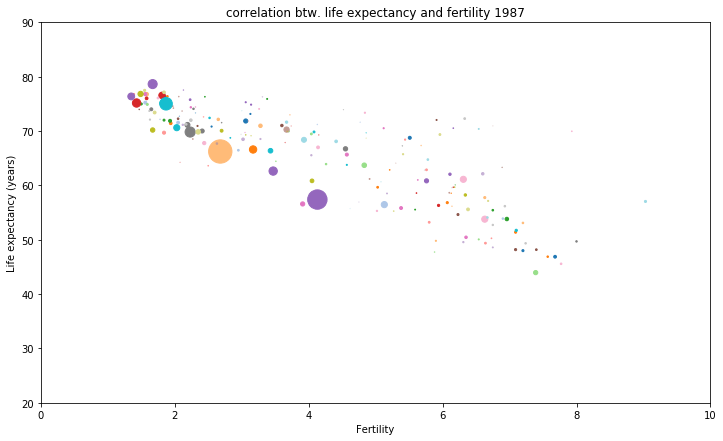

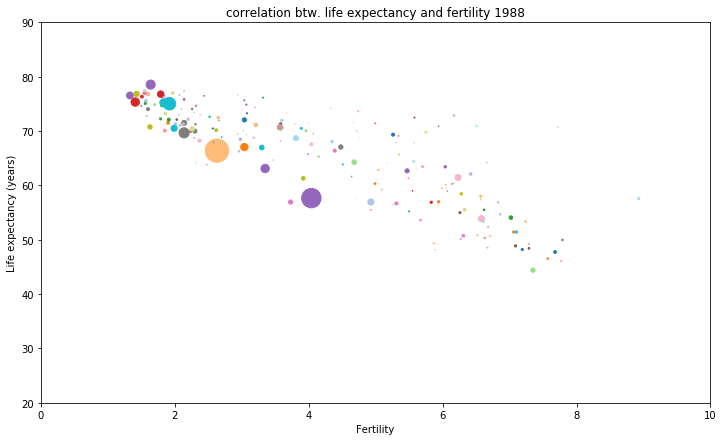

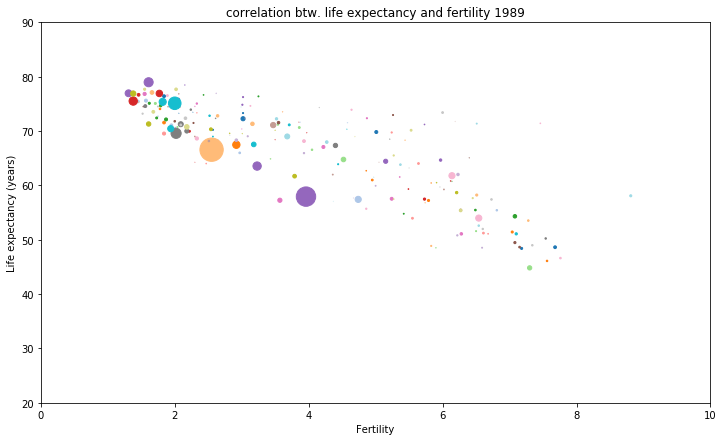

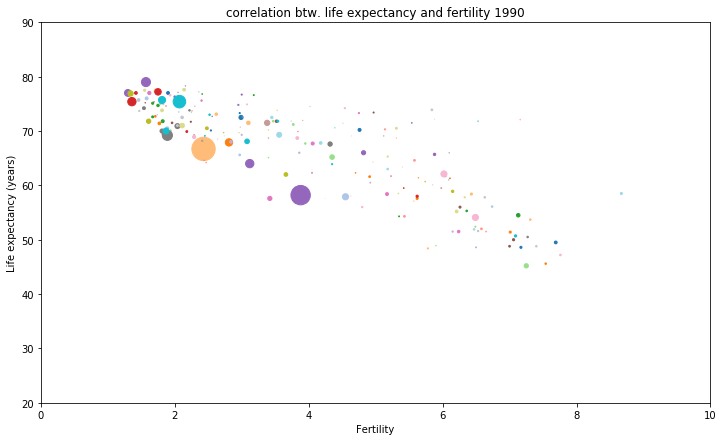

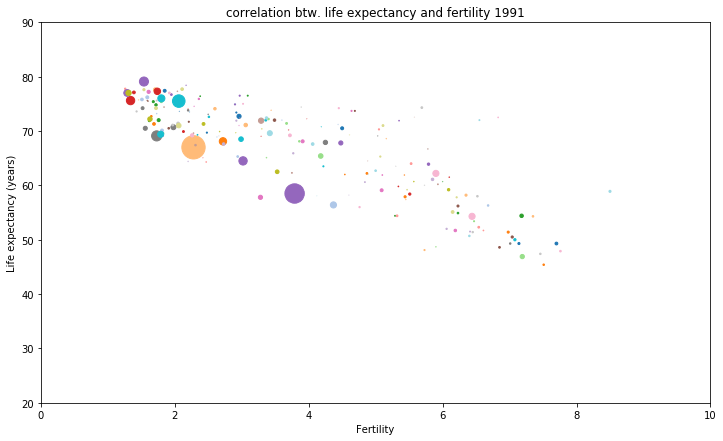

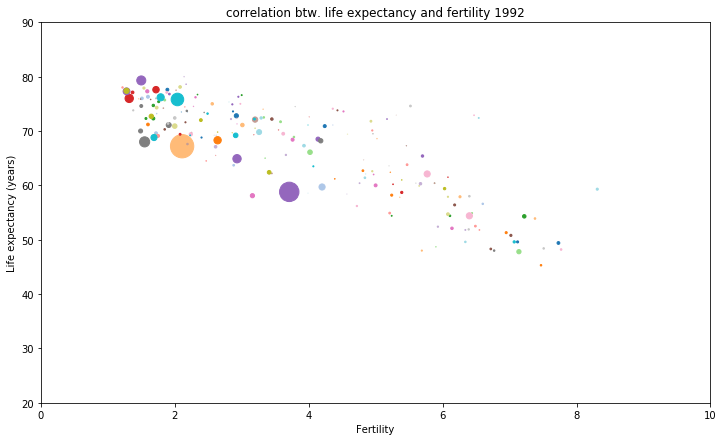

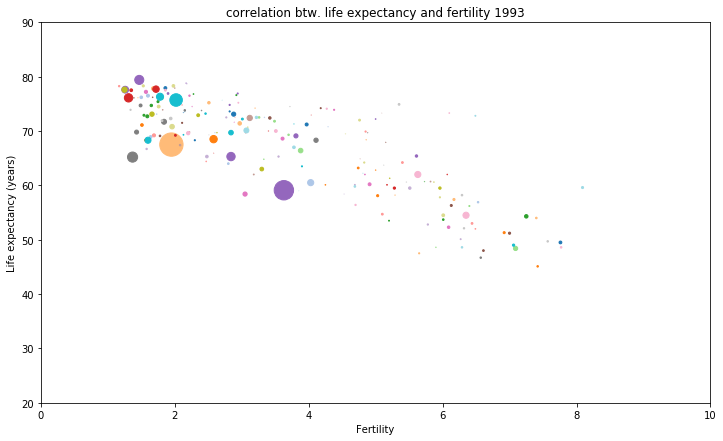

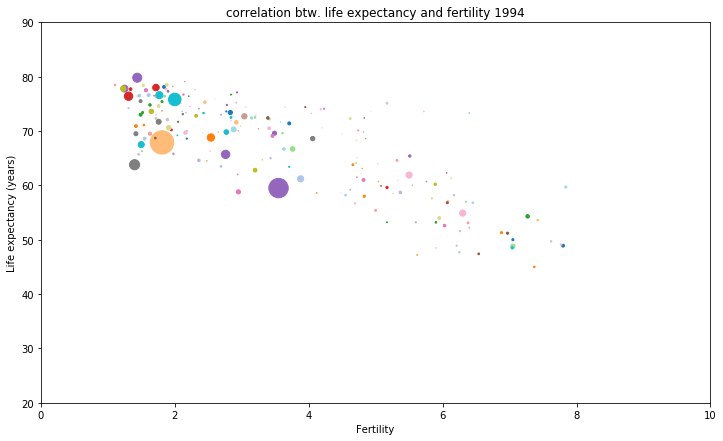

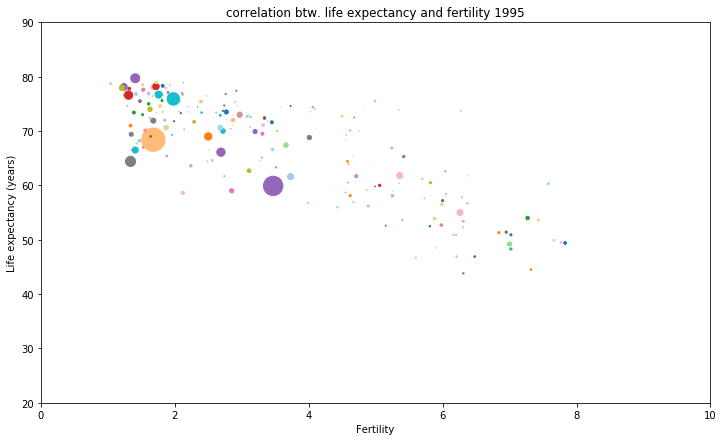

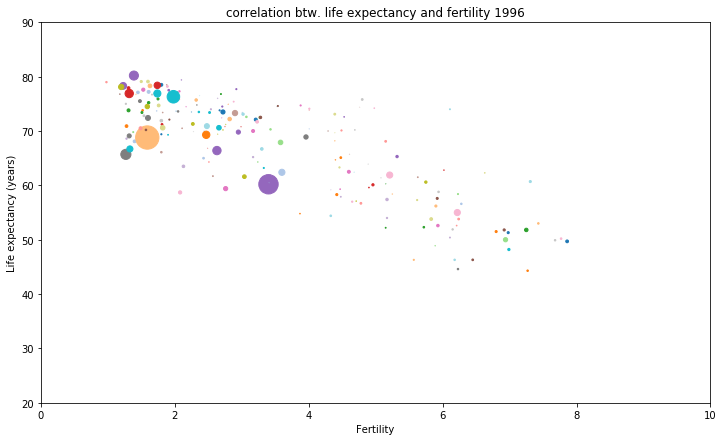

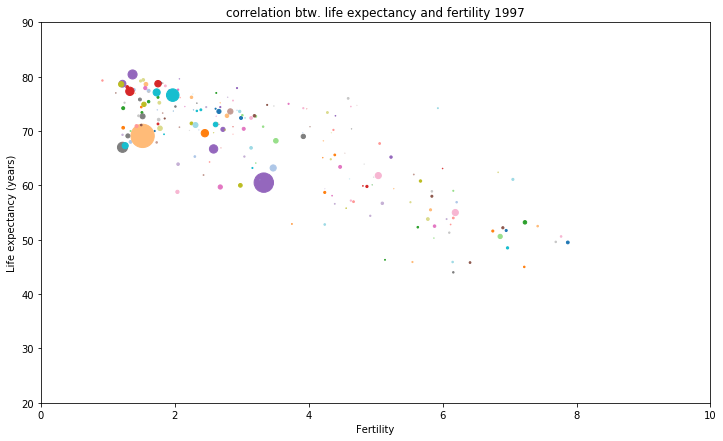

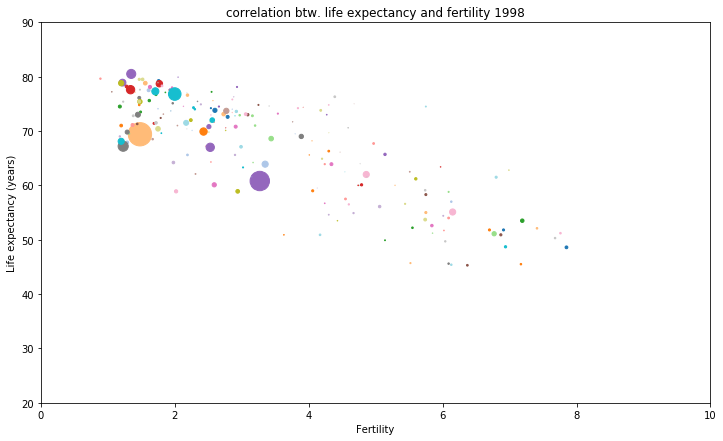

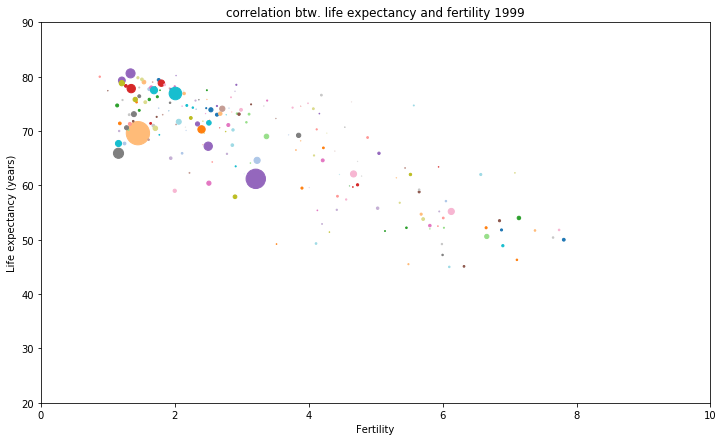

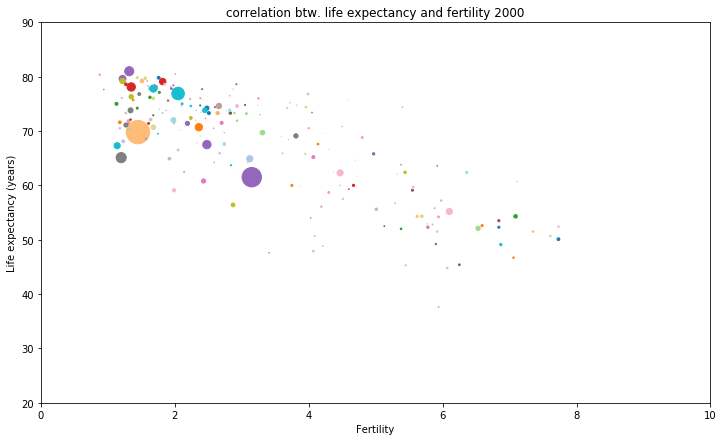

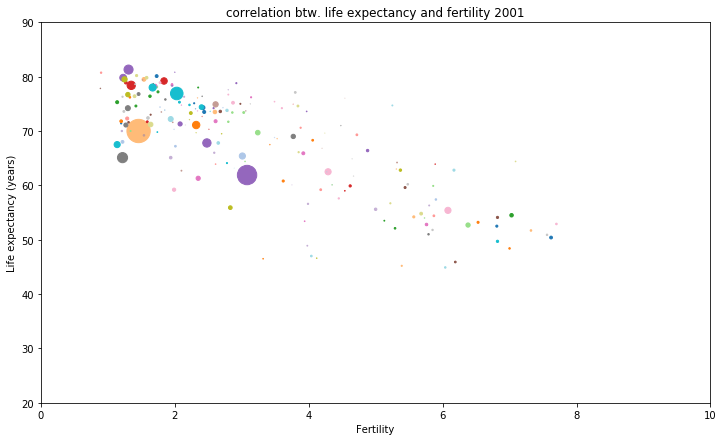

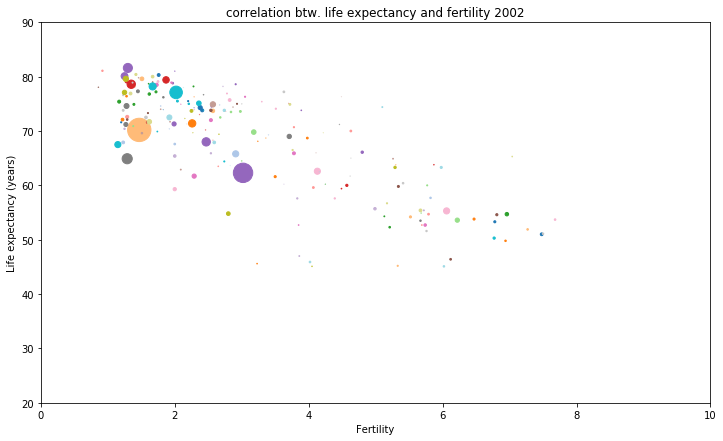

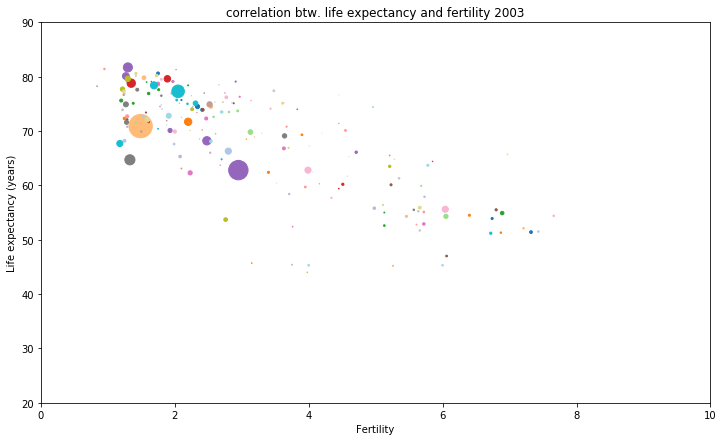

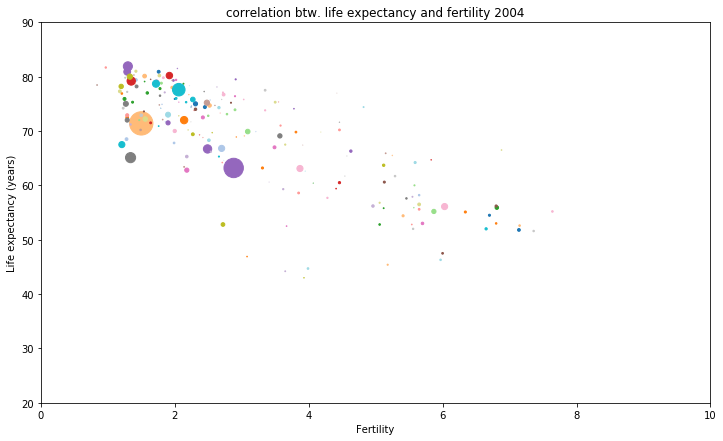

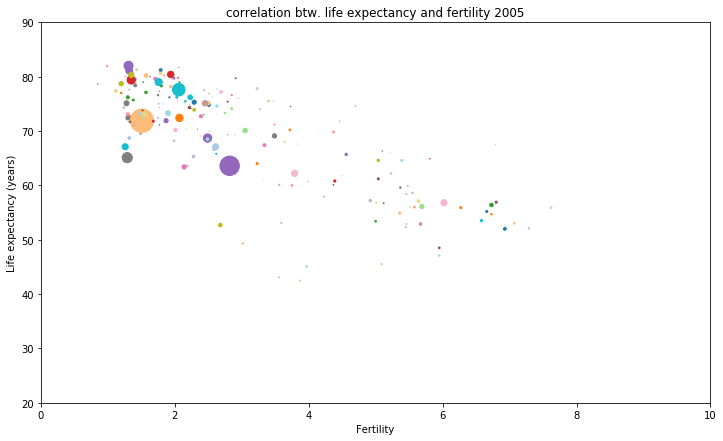

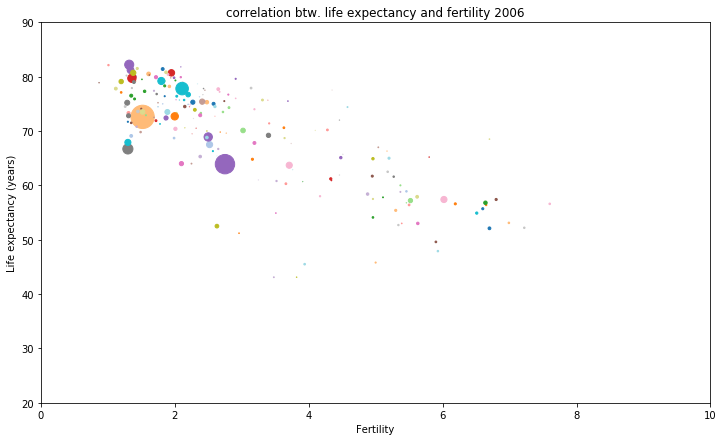

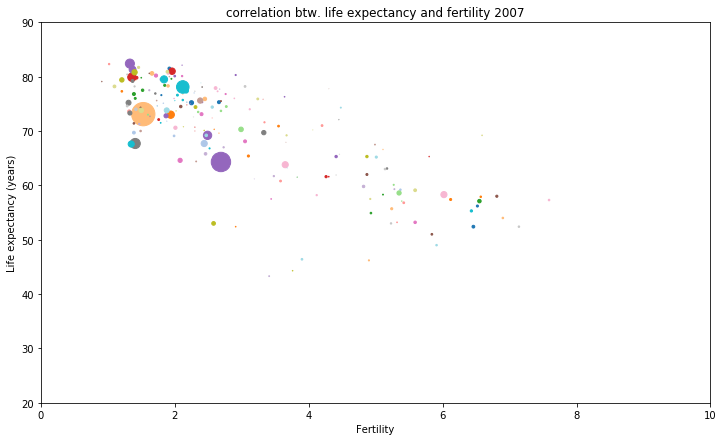

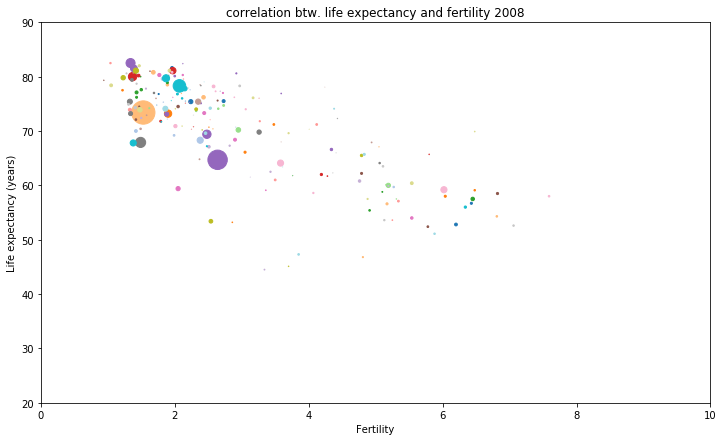

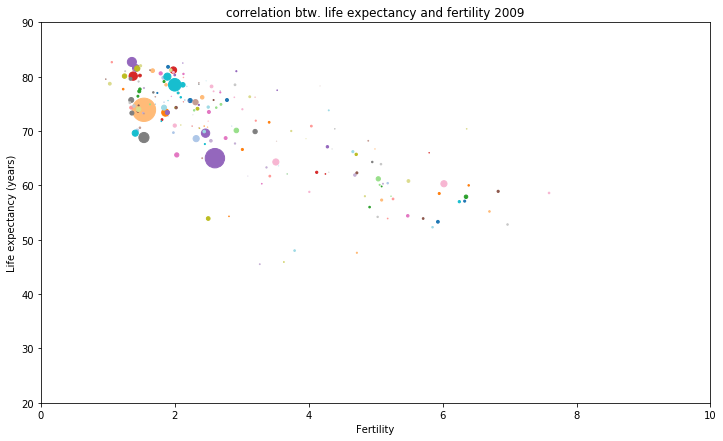

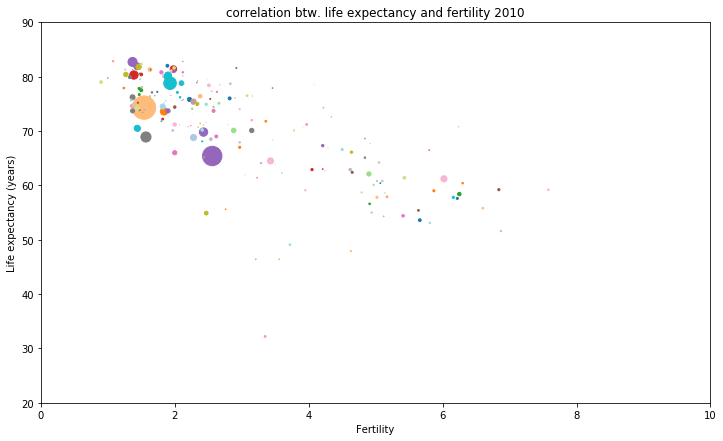

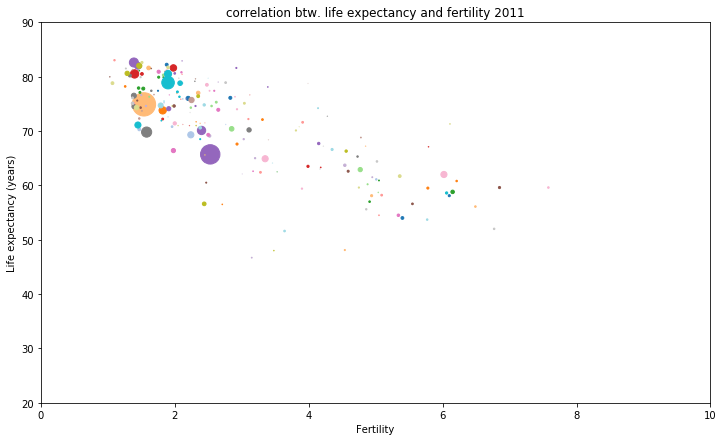

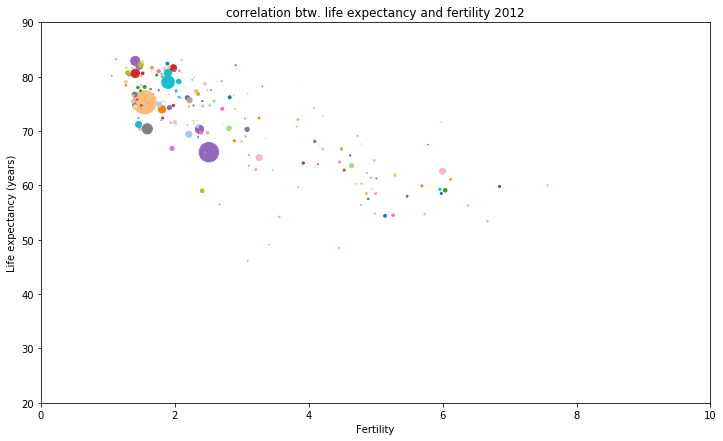

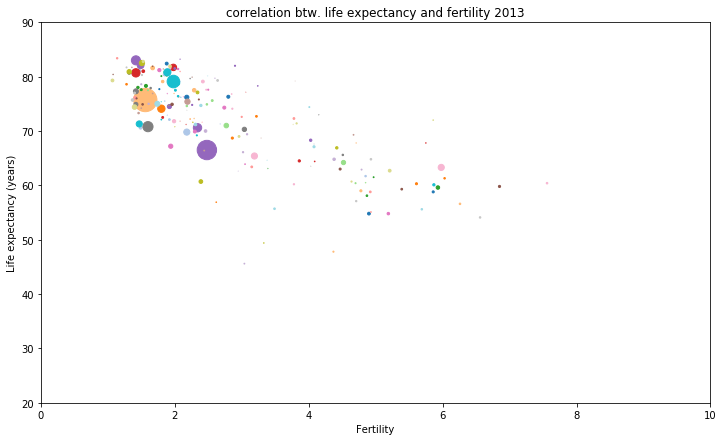

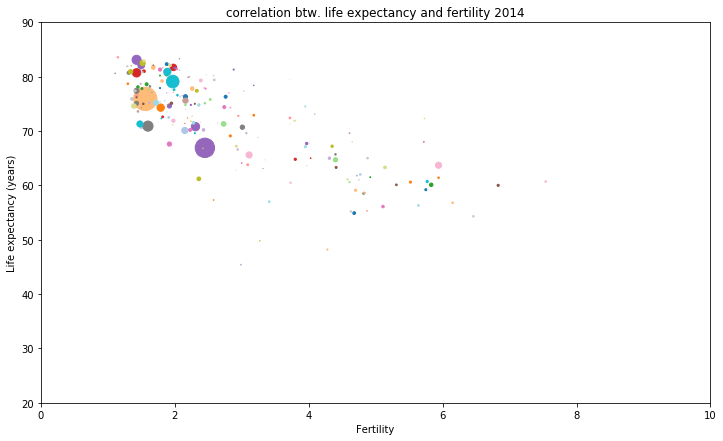

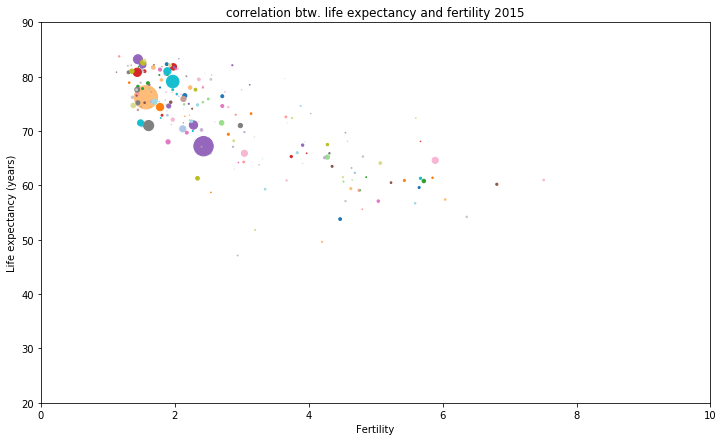

In [336]:
cmap = plt.get_cmap('tab20', lut = len(df6)).colors
for year in df7:
    df7[year].unstack(1).plot.scatter('fertility', 'lifeexp', s=df6['population']/1000000, c=cmap, figsize=(12,7),  title=f'correlation btw. life expectancy and fertility {year}')
    plt.axis((0,10,20,90))
    plt.savefig(f'plots/lifeexp_{year}.png')
    plt.ylabel("Life expectancy (years)")
    plt.xlabel("Fertility")
    plt.show()

Adjust the plot, so that the size of the symbols represents the population from the gapminder dataset.

In [52]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


In [338]:
import imageio

list_of_images = []

for year in df7:
    im = imageio.imread(f'plots/lifeexp_{year}.png')
    list_of_images.append(im)
imageio.mimsave('output.gif', list_of_images, fps=10)
